In [ ]:
#This is a condensed and consolidated version of my code (combining multiple of my Jupyter Notebooks).

In [ ]:
#import necessary libaries
import spotipy
import spotipy.util as util
import csv
import requests
import shutil
import urllib.request

#setup authorization(more information on this in the setup authorization file)
username = #spotify username, not display name
client_id = #can be found on API
client_secret = #can be found on API
redirect_uri = 'http://localhost:7778/callback' #or any other webpage 
scope = 'user-library-read'

token = util.prompt_for_user_token(username = username, 
                                   scope = scope, 
                                   client_id = client_id,   
                                   client_secret = client_secret,     
                                   redirect_uri = redirect_uri)

spotify = spotipy.Spotify(auth = token)


#chose playlist of songs 
playlist = spotify.playlist_tracks(playlist_id = '...')


#create list for track ids
aList = []
#add the id of each song in the playlist
for x in playlist['items']:
    	aList.append(x['track']['id'])

#if there are over 100 songs in the playlist run this:
while playlist['next']:
	#move to next 100 songs
	playlist = spotify.next(playlist)
	for x in playlist['items']:
		aList.append(x['track']['id'])


#create list for track names, this will help with artist name
bList = []
#reset the playlist
playlist = spotify.playlist_tracks(playlist_id = '...')
#add the name of each song in the playlist
for x in playlist['items']:
	bList.append(x['track']['name'])
#if there are over 100 songs in the playlist run this:
while playlist['next']:
	#move to next 100 songs
	playlist = spotify.next(playlist)
	for x in playlist['items']:
		bList.append(x['track']['name'])
#write list to csv in row form
outfile1 = open(r'C:\...\names.csv','w') #replace '...' with where you want the file to save
out = csv.writer(outfile1)
out.writerows(map(lambda x: [x], bList))
outfile1.close()


#create a list of album art URLs
cList = []
#for each song id grab the album image
for id in aList:
	song = spotify.track(id)
	cList.append(song['album']['images'][0]['url'])


#create list for album names
dList = []
#for each song id grab the album name
for id in aList:
	song = spotify.track(id)
	eList.append(song['album']['name'])
#write list to csv in row form
outfile2 = open(r'C:\...\albums.csv','w') #replace '...' with where you want the file to save
out = csv.writer(outfile2)
out.writerows(map(lambda x: [x], eList))
outfile2.close()


#download images and save as the album name, save to a folder for later use
for url in range(len(cList)):
    urllib.request.urlretrieve(cList[url], 
      r"C:\...AlbumArt\images\{}.jpg".format(eList[url]))
#this is an example of what I did for all four playlists

In [ ]:
import glob
import pandas as pd
from colorthief import ColorThief
import matplotlib.pyplot as plt

# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\...\AlbumArt\images\*.jpg")

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=3)

# Print the dominant colors
    #print(dominant_colors), optional

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])

# Plot the distribution of dominant colors using a histogram
df.plot.hist(column=['R','G','B'], bins=10, alpha=0.5, color=['r','g','b'])
plt.xlabel("RGB Color")
plt.ylabel("Frequency")
plt.title("90s Albums Histograms")

plt.savefig(r'C:\...\figures\90s_histogram.png')   # save the figure to file, preferably in a separate folder in the same location
plt.close()
plt.show()

#repeat for other images (2000s, 2010s, and 2020)

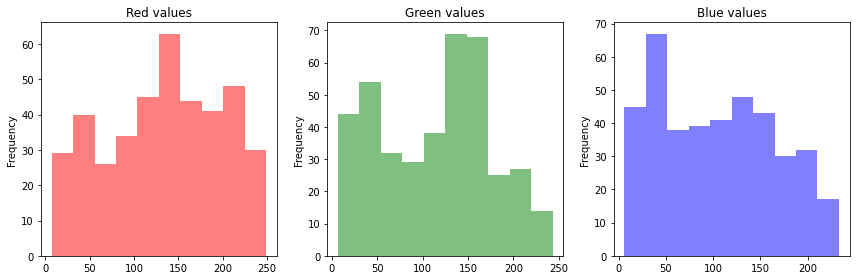

In [12]:
#if I want to separate the histograms
# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\Users\ememe\Documents\music data project\spotify python data\00s\AlbumArt\images\*.jpg")

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=3)

# Print the dominant colors
    #print(dominant_colors)

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histogram for the red values in the first subplot
df['R'].plot.hist(bins=10, alpha=0.5, color = 'red', ax=ax1)
ax1.set_title('Red values')

# Plot the histogram for the green values in the second subplot
df['G'].plot.hist(bins=10, alpha=0.5, color = 'green', ax=ax2)
ax2.set_title('Green values')

# Plot the histogram for the blue values in the third subplot
df['B'].plot.hist(bins=10, alpha=0.5, color = 'blue', ax=ax3)
ax3.set_title('Blue values')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#repeat for other images (2000s, 2010s, and 2020)

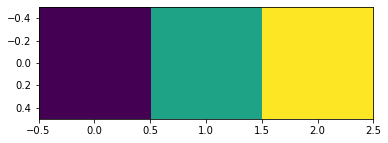

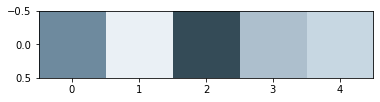

In [25]:
#testing color palette function 
# Use glob to get a list of file paths for all the images in the folder
testing = (r"C:\...\00s\AlbumArt\images\The Breakthrough.jpg")

# Create a list to store the dominant colors for each image
colors2 = []

# Loop through the list of image paths

# Use the ColorThief object to extract the dominant color from the image
color_thief2 = ColorThief(testing)
dominant_color2 = color_thief2.get_color(quality=1)
dominant_colors2 = color_thief2.get_palette(color_count=10)

# Print the dominant colors
    #print(dominant_colors)

    # Add the file path and dominant color to the list

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])

# Plot the distribution of dominant colors using a histogram
plt.imshow([dominant_color2])
plt.show()

dominant_colors = color_thief.get_palette(color_count=10)
plt.imshow([[dominant_colors2[i] for i in range (5)]])
plt.show()

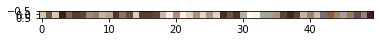

In [28]:
# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\...\90s\AlbumArt\images\*.jpg")

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=255)

# Print the dominant colors
    #print(dominant_colors)

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])



dominant_colors = color_thief.get_palette(color_count=255)
plt.imshow([[dominant_colors[i] for i in range (50)]])
plt.show()

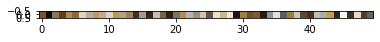

In [29]:
# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\...\00s\AlbumArt\images\*.jpg")

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=255)

# Print the dominant colors
    #print(dominant_colors)

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])



dominant_colors = color_thief.get_palette(color_count=255)
plt.imshow([[dominant_colors[i] for i in range (50)]])
plt.show()

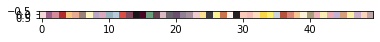

In [30]:
# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\...\10s\AlbumArt\images\*.jpg")

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=255)

# Print the dominant colors
    #print(dominant_colors)

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])



dominant_colors = color_thief.get_palette(color_count=255)
plt.imshow([[dominant_colors[i] for i in range (50)]])
plt.show()

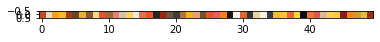

In [31]:
# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\...\20s\AlbumArt\images\*.jpg")

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=255)

# Print the dominant colors
    #print(dominant_colors)

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])



dominant_colors = color_thief.get_palette(color_count=255)
plt.imshow([[dominant_colors[i] for i in range (50)]])
plt.show()

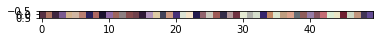

In [48]:
#randomizing images in folder
import random

# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\...\10s\AlbumArt\images\*.jpg")

# Shuffle the list of image paths
random.shuffle(image_paths)

# Get the first 30 images
first_30_image_paths = image_paths[:30]

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in first_30_image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=255)

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])

dominant_colors = color_thief.get_palette(color_count=255)
plt.imshow([[dominant_colors[i] for i in range (50)]])
plt.show()

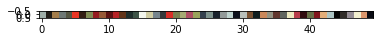

In [50]:
import random

# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\...\00s\AlbumArt\images\*.jpg")

# Shuffle the list of image paths
random.shuffle(image_paths)

# Get the first 30 images
first_30_image_paths = image_paths[:30]

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in first_30_image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=255)

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])

dominant_colors = color_thief.get_palette(color_count=255)
plt.imshow([[dominant_colors[i] for i in range (50)]])
plt.show()

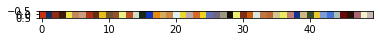

In [51]:
import random

# Use glob to get a list of file paths for all the images in the folder
image_paths = glob.glob(r"\...\90s\AlbumArt\images\*.jpg")

# Shuffle the list of image paths
random.shuffle(image_paths)

# Get the first 30 images
first_30_image_paths = image_paths[:30]

# Create a list to store the dominant colors for each image
colors = []

# Loop through the list of image paths
for path in first_30_image_paths:
    # Use the ColorThief object to extract the dominant color from the image
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color()
    dominant_colors = color_thief.get_palette(color_count=255)

    # Add the file path and dominant color to the list
    for color in dominant_colors:
        colors.append({'path': path, 'R': color[0], 'G': color[1], 'B': color[2]})

# Create a DataFrame from the list of colors
df = pd.DataFrame(colors, columns=['B', 'R', 'G'])

dominant_colors = color_thief.get_palette(color_count=255)
plt.imshow([[dominant_colors[i] for i in range (50)]])
plt.show()